In [1]:
import h5py

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings


import yaml
with open("../config/RUN000054.yml", 'r') as stream:
    cfg = yaml.safe_load(stream)

In [3]:
import importlib
import sys

sys.path.append('../dataset_script')

import dataset_script

from dataset_script import buildDataframe

In [ ]:
# Run reco algorithm on splitted dataset
df = pd.DataFrame()
bounds = list(range(0, len(stream_df), 10000000))+[len(stream_df)]
for i in range(1,len(bounds)):
    df_ = buildDataframe(stream_df[bounds[i-1]:bounds[i]], cfg)
    df = pd.concat([df, df_], axis=0, ignore_index=True)

In [ ]:
# Save results
RUNNUMBER = "0054"
OUTPUT_PATH = "../data/"
from dataset_script import saveChannels
channels = saveChannels(df, OUTPUT_PATH, RUNNUMBER)

Read reco result from h5 file

In [4]:
# path to data file
FILE_NAME = "../data/RUN000054_channels.h5"

# get keys
f = h5py.File(FILE_NAME, "r")
keys = f.keys()

# build the dataset by concatenating all channels together
df = pd.concat(
    [
        pd.read_hdf(FILE_NAME, key=k, mode="r") for k in keys
    ],
    ignore_index=True
)

# rename columns
df = df.rename(columns={"CH":"ch", "HIT_DRIFT_TIME":"drift_time", "THETA":"theta"})

print(f"Shape: {df.shape}")
print(f'Features: {list(df.columns)}')

Shape: (1059990, 5)
Features: ['ch', 'drift_time', 'D_WIRE_HIT', 'm', 'theta']


In [5]:
df["SL"] = df["ch"]//64
df["SL"][df["SL"]<2] = [int(not x) for x in df["SL"]]

/tmp/ipykernel_4985/2426647731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SL"][df["SL"]<2] = [int(not x) for x in df["SL"]]


Text(0.5, 0, 'd_wire_hit')

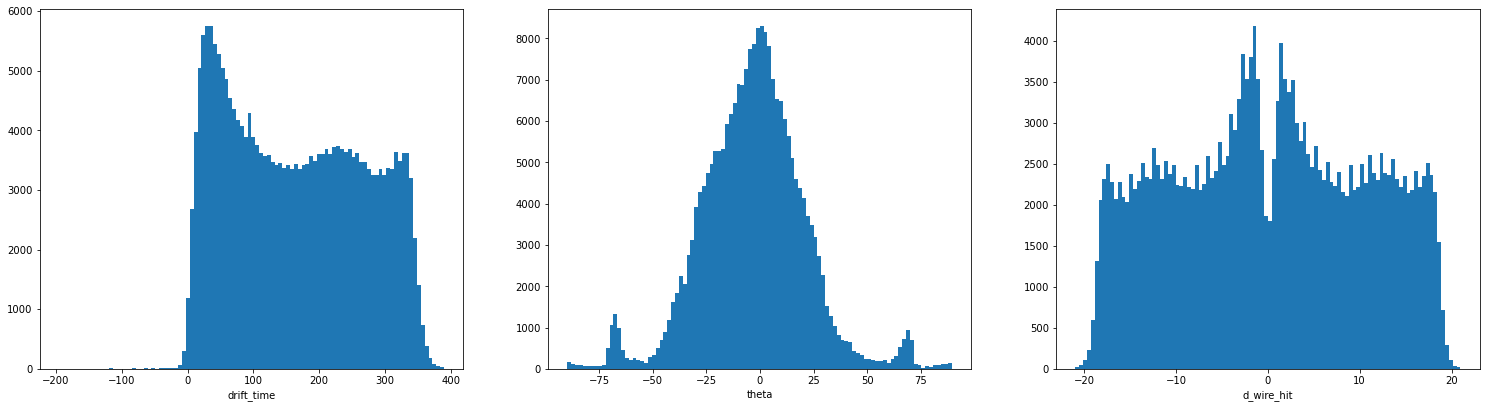

In [6]:
sl = 2
fig = plt.figure(figsize=(20, 5))
plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)

sub1 = fig.add_subplot(1,3,1) 
sub1.hist(df[df["SL"]==sl]['drift_time'], bins = 100)
sub1.set_xlabel("drift_time")


sub2 = fig.add_subplot(1,3,2) 
sub2.hist(df[df["SL"]==sl]['theta'], bins = 100)
sub2.set_xlabel("theta")
"""""
sub2 = fig.add_subplot(1,3,2) 
sub2.hist(df[df["SL"]==sl-1]['D_WIRE_HIT'], bins = 100)
sub2.set_xlabel("d_wire_hit")
"""""

sub3 = fig.add_subplot(1,3,3) 
sub3.hist(df[df["SL"]==sl]['D_WIRE_HIT'], bins = 100)
sub3.set_xlabel("d_wire_hit")